In [4]:
import sympy as sp
import numpy as np
import scipy
import matplotlib.pyplot as plt


In [130]:

def msd_dynamics(t, x, u):
    t = sp.symbols('t')
    # Edge variables
    e1, f1, e2, f2, e3, f3, e4, f4 = sp.symbols('e1, f1, e2, f2, e3, f3, e4, f4')

    # Node variables
    q2, p3 = sp.symbols('q2, p3')

    # Node variable derivatives
    q2_dot, p3_dot = sp.symbols('q2_dot, p3_dot')

    # Input variables
    u1 = sp.symbols('u1')

    # Parameters
    I3 = 3
    C2 = 0.05
    R4 = 1


    # Substitute in the actual value of the state variable
    q2 = x[0]
    p3 = x[1]
    
    # Substitute control input
    u1 = u
    
    # State space equations
    sys_eq = [
    sp.Eq(e3, e1 - e2 - e4),
    sp.Eq(f1, f3),
    sp.Eq(f2, f3),
    sp.Eq(f4, f3),
    # sp.Eq(sp.Derivative(p3, t), f3),
    # sp.Eq(sp.Derivative(q2, t), f2),
    sp.Eq(q2_dot, f2),
    sp.Eq(p3_dot, e3),
    sp.Eq(f3, p3/I3),
    sp.Eq(e2, q2/C2),
    sp.Eq(e4, f4*R4),
    sp.Eq(e1, u1)]


    

    # print("System Equations: ", sys_eq)
    A, b = sp.linear_eq_to_matrix(sys_eq, q2_dot, p3_dot, e1, f1, e2, f2, e3, f3, e4, f4)
    # print(f'A: {A}')
    # print(f'A shape: {A.shape}')
    # # print(f'A RREF: {A.rref()}')
    # print()
    # print(f'b: {b}')
    # print(f'b shape: {b.shape}')
    # print()
    # print(np.linalg.solve(np.array(A).astype('float'), np.array(b).astype('float')))
    
    # A, b = sp.linear_eq_to_matrix(sys_eq, q2_dot, p3_dot)
    
    x = np.linalg.solve(np.array(A).astype('float'), np.array(b).astype('float'))
    x = x.flatten()

    
    # # Substitute all equations except for the state derivatives
    # subs_eq = [(e1, u1), (e2, q2/C2), (e3, u1 - q2/C2 - f4*R4), (f3, p3/I3), (f2, p3/I3), (f4, p3/I3)]
    # sys_eq_subs = [eq.subs(subs_eq) for eq in sys_eq]
    
    # print(sys_eq_subs)
    # # Solve for state derivatives
    # sol = sp.solve(sys_eq_subs, (q2_dot, p3_dot))
    # print("Solution: ", sol)
    
    
    # print("Solution: ", sol)
    return (x[0], x[1])



In [131]:
msd_dynamics(0, [1, 0], 1)

(0.0, -19.0)

In [132]:

t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 1000)
x0 = [0.5, 0]

sol = scipy.integrate.solve_ivp(msd_dynamics, t_span, x0, args=(100,),method='RK45', t_eval=t_eval)
print(type(sol))



<class 'scipy.integrate._ivp.ivp.OdeResult'>


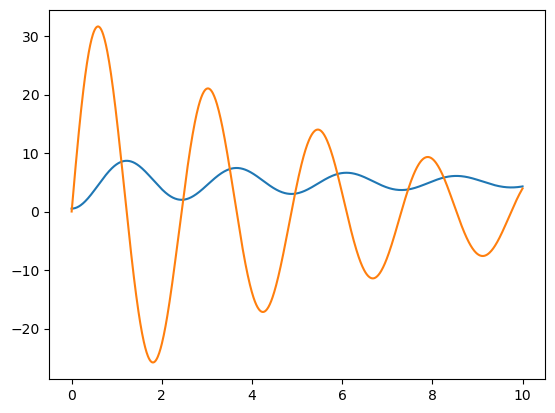

In [133]:
# print(sol.y[0])
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])